# Практическая работа 3

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## Задание 1
Загрузить данные из файла "insurance.csv".

In [4]:
insurance = pd.read_csv('source/insurance.csv')
print(f"Размер датасета: {insurance.shape}")
print(f"Колонки: {list(insurance.columns)}")
insurance.head()

Размер датасета: (1338, 7)
Колонки: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Задание 2
С помощью метода describe() посмотреть статистику по данным. Сделать выводы.

In [6]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Выводы:**
- Датасет содержит 1338 записей без пропусков
- Возраст варьируется от 18 до 64 лет, средний возраст 39 лет
- ИМТ (bmi) в среднем 30.7, что соответствует легкому ожирению по классификации ВОЗ
- Количество детей от 0 до 5, в среднем чуть больше 1 ребенка
- Расходы на страхование сильно варьируются: от $1122 до $63770, среднее $13270
- Большой разброс в расходах указывает на наличие выбросов или разных групп клиентов

## Задание 3
Построить гистограммы для числовых показателей. Сделать выводы.

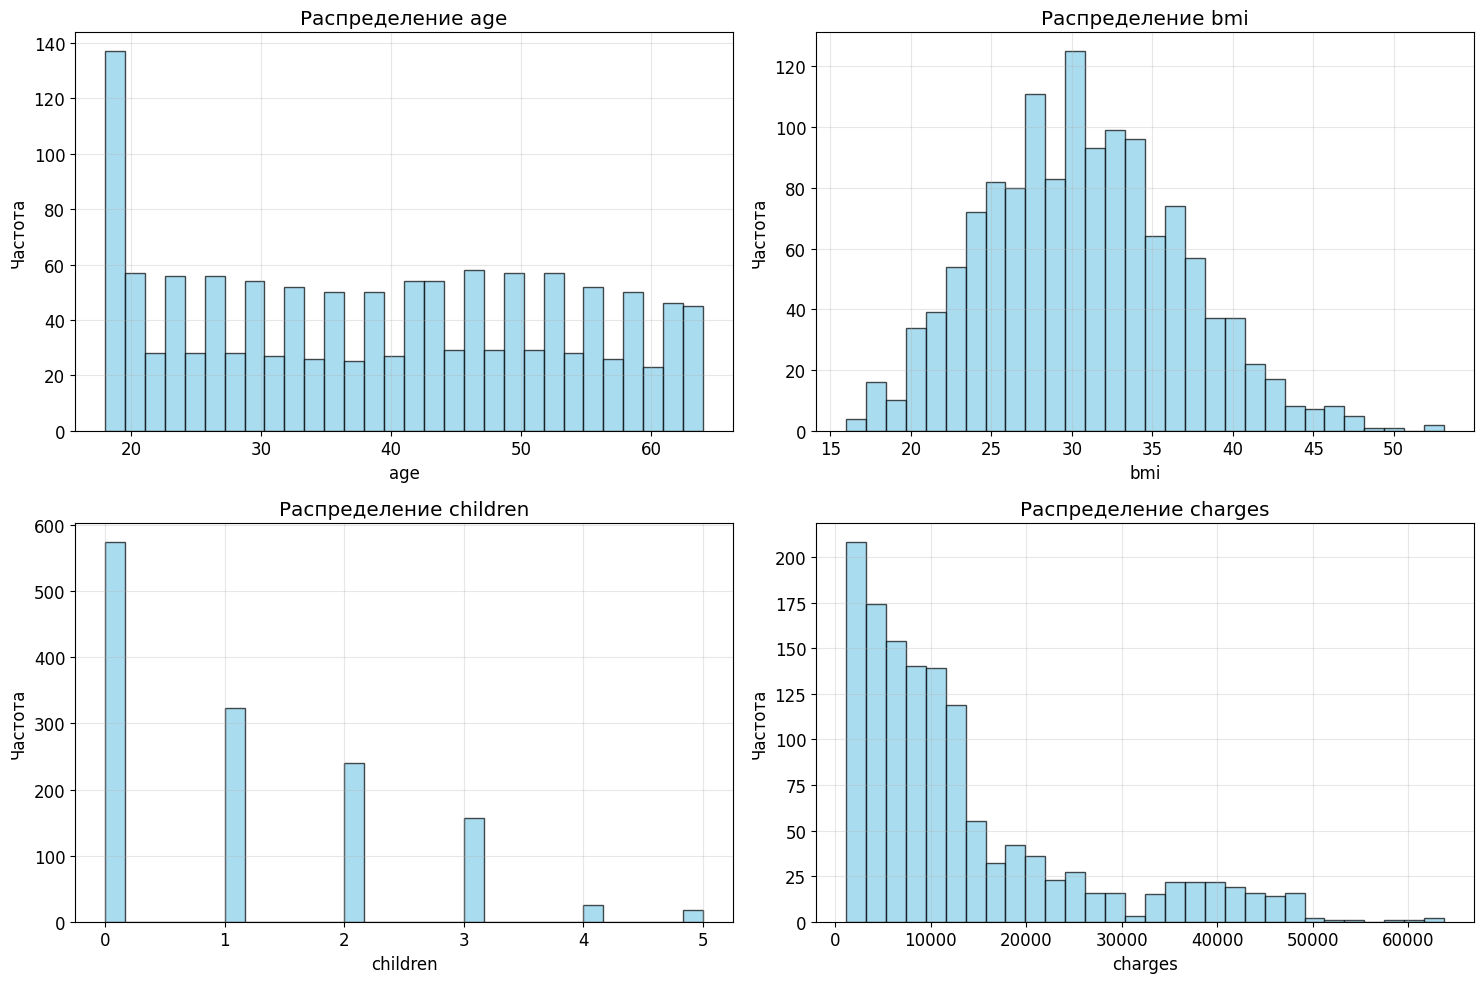

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
numerical_cols = ['age', 'bmi', 'children', 'charges']

for i, col in enumerate(numerical_cols):
    ax = axes[i//2, i%2]
    ax.hist(insurance[col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(f'Распределение {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Частота')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Выводы:**
- **age**: Распределение близко к равномерному, все возрастные группы представлены примерно одинаково
- **bmi**: Распределение близко к нормальному с легкой правосторонней асимметрией, центр около 30
- **children**: Дискретное распределение, большинство семей имеет 0-2 детей
- **charges**: Сильно правосторонняя асимметрия, большинство расходов низкие, но есть выбросы с очень высокими расходами

## Задание 4
Найти меры центральной тенденции и меры разброса для индекса массы тела (bmi) и расходов (charges). Отобразить результаты в виде текста и на гистограммах (3 вертикальные линии). Добавить легенду на графики. Сделать выводы.

In [8]:
def calculate_measures(data, column):
    mean_val = data[column].mean()
    median_val = data[column].median()
    mode_val = data[column].mode().iloc[0]
    std_val = data[column].std()
    range_val = data[column].max() - data[column].min()
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr_val = q3 - q1
    
    print(f"\n=== {column.upper()} ===")
    print(f"Меры центральной тенденции:")
    print(f"  Среднее: {mean_val:.2f}")
    print(f"  Медиана: {median_val:.2f}")
    print(f"  Мода: {mode_val:.2f}")
    print(f"\nМеры разброса:")
    print(f"  Стандартное отклонение: {std_val:.2f}")
    print(f"  Размах: {range_val:.2f}")
    print(f"  Межквартильный размах (IQR): {iqr_val:.2f}")
    
    return mean_val, median_val, mode_val

bmi_mean, bmi_median, bmi_mode = calculate_measures(insurance, 'bmi')
charges_mean, charges_median, charges_mode = calculate_measures(insurance, 'charges')


=== BMI ===
Меры центральной тенденции:
  Среднее: 30.66
  Медиана: 30.40
  Мода: 32.30

Меры разброса:
  Стандартное отклонение: 6.10
  Размах: 37.17
  Межквартильный размах (IQR): 8.40

=== CHARGES ===
Меры центральной тенденции:
  Среднее: 13270.42
  Медиана: 9382.03
  Мода: 1639.56

Меры разброса:
  Стандартное отклонение: 12110.01
  Размах: 62648.55
  Межквартильный размах (IQR): 11899.63


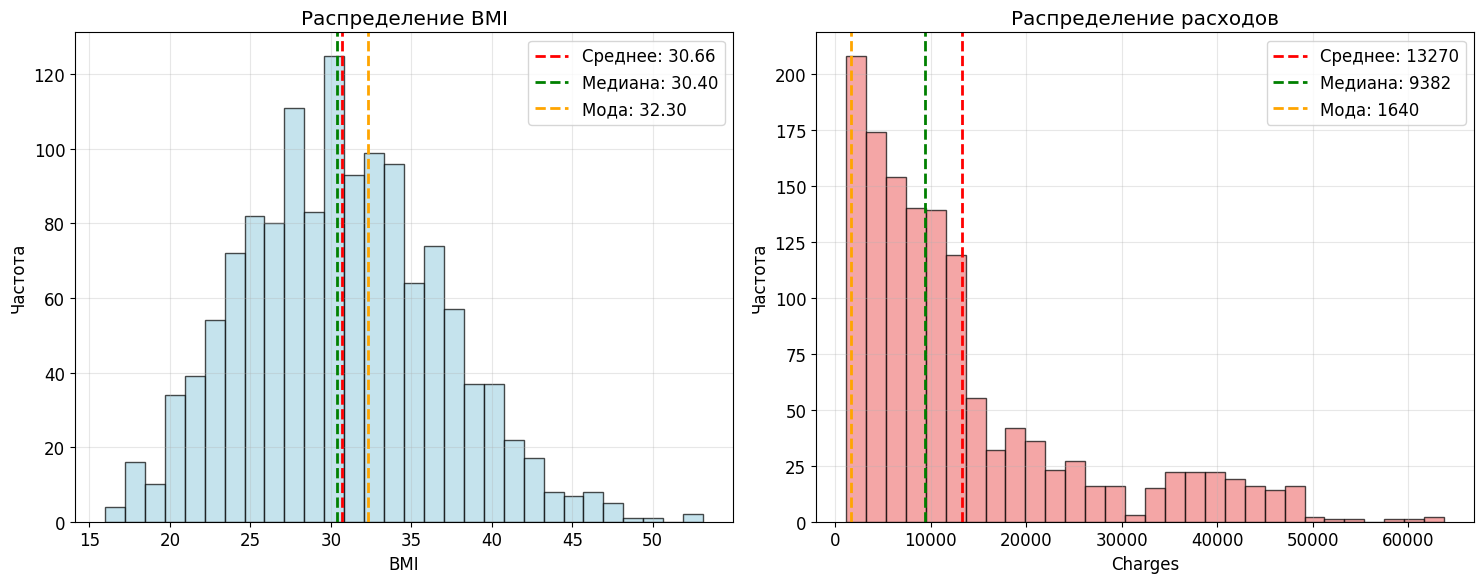

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].hist(insurance['bmi'], bins=30, alpha=0.7, color='lightblue', edgecolor='black')
axes[0].axvline(bmi_mean, color='red', linestyle='--', linewidth=2, label=f'Среднее: {bmi_mean:.2f}')
axes[0].axvline(bmi_median, color='green', linestyle='--', linewidth=2, label=f'Медиана: {bmi_median:.2f}')
axes[0].axvline(bmi_mode, color='orange', linestyle='--', linewidth=2, label=f'Мода: {bmi_mode:.2f}')
axes[0].set_title('Распределение BMI')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Частота')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].hist(insurance['charges'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1].axvline(charges_mean, color='red', linestyle='--', linewidth=2, label=f'Среднее: {charges_mean:.0f}')
axes[1].axvline(charges_median, color='green', linestyle='--', linewidth=2, label=f'Медиана: {charges_median:.0f}')
axes[1].axvline(charges_mode, color='orange', linestyle='--', linewidth=2, label=f'Мода: {charges_mode:.0f}')
axes[1].set_title('Распределение расходов')
axes[1].set_xlabel('Charges')
axes[1].set_ylabel('Частота')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Выводы:**
- **BMI**: Среднее, медиана и мода очень близки (30.66, 30.40, 32.30), что указывает на симметричное распределение, близкое к нормальному
- **Charges**: Среднее (13270) значительно больше медианы (9382) и моды (1639), что характерно для правосторонней асимметрии. Медиана лучше характеризует типичное значение, так как она менее чувствительна к выбросам
- Стандартное отклонение расходов очень большое, что подтверждает наличие выбросов
- IQR для расходов показывает, что 50% данных сосредоточено в относительно узком диапазоне

## Задание 5
Построить box-plot для числовых показателей. Названия графиков должны соответствовать названиям признаков. Сделать выводы.

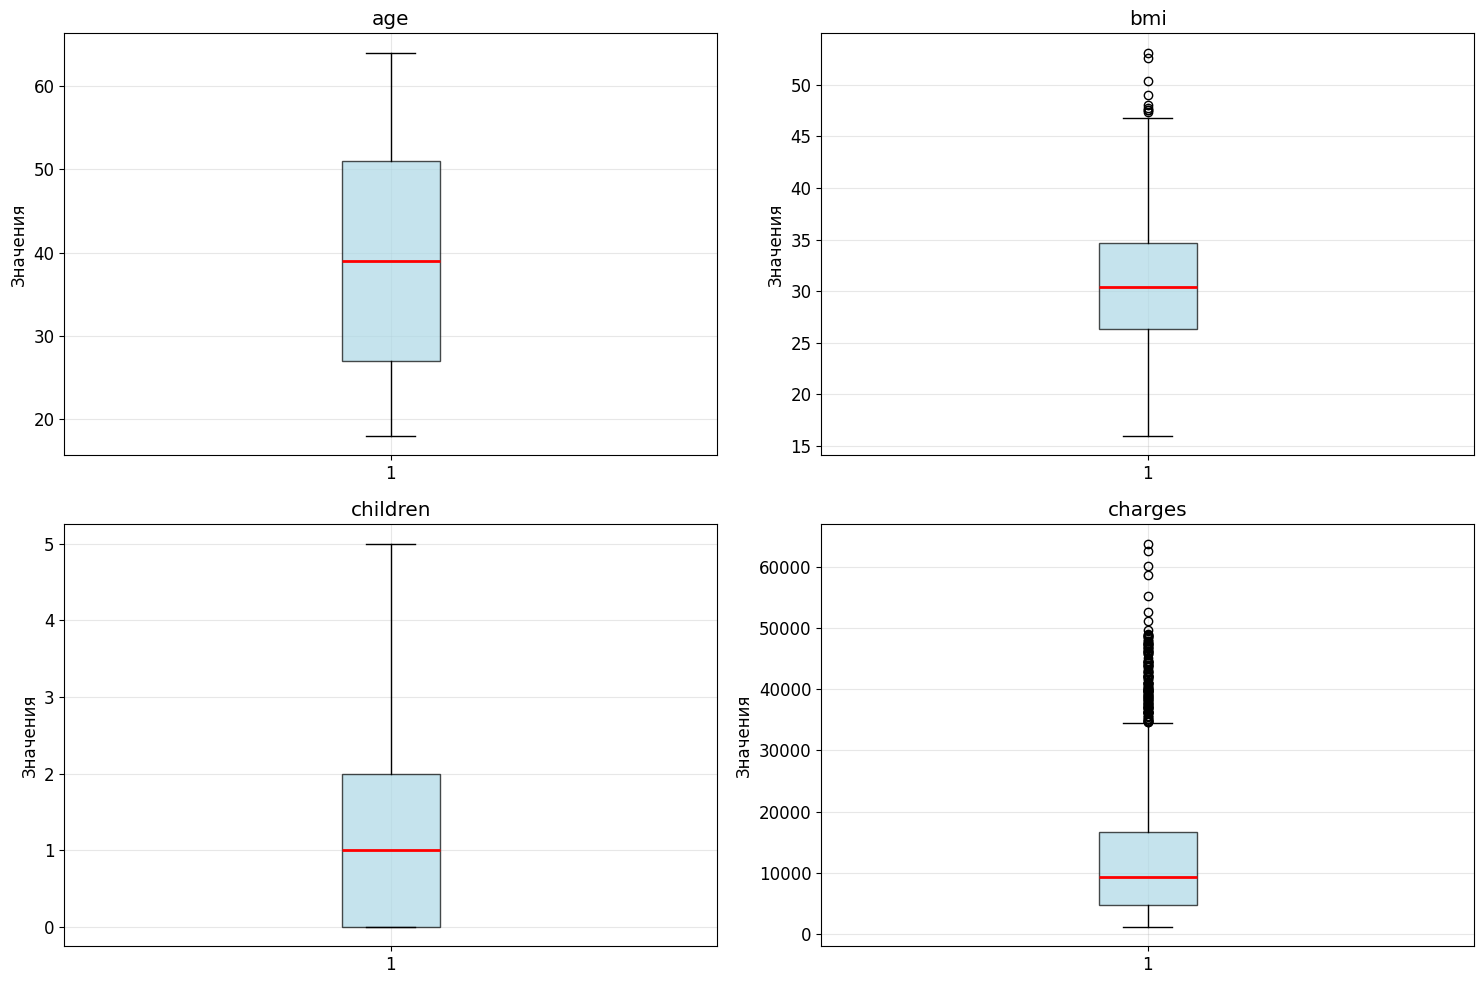

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
numerical_cols = ['age', 'bmi', 'children', 'charges']

for i, col in enumerate(numerical_cols):
    ax = axes[i//2, i%2]
    ax.boxplot(insurance[col], patch_artist=True, 
               boxprops=dict(facecolor='lightblue', alpha=0.7),
               medianprops=dict(color='red', linewidth=2))
    ax.set_title(col)
    ax.set_ylabel('Значения')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Выводы:**
- **age**: Симметричное распределение, медиана в центре ящика, усы примерно одинаковой длины, выбросов нет
- **bmi**: Почти симметричное распределение с небольшим количеством выбросов в верхней части (высокие значения ИМТ)
- **children**: Медиана смещена к нижней границе, что отражает дискретную природу данных. Много наблюдений с 0 детей
- **charges**: Сильная правосторонняя асимметрия, медиана значительно ниже центра ящика, много выбросов с высокими расходами. Это подтверждает наличие клиентов с исключительно высокими страховыми расходами

## Задание 6
Используя признак charges или bmi, проверить, выполняется ли центральная предельная теорема. Использовать различные длины выборок n. Количество выборок = 300. Вывести результат в виде гистограмм. Найти стандартное отклонение и среднее для полученных распределений. Сделать выводы.

Параметры генеральной совокупности (charges):
Среднее: 13270.42
Стандартное отклонение: 12110.01

n = 5:
  Фактическое среднее выборочных средних: 13431.64
  Фактическое стандартное отклонение: 5671.83
  Теоретическая стандартная ошибка: 5415.76
  Отношение факт/теор: 1.047

n = 15:
  Фактическое среднее выборочных средних: 13185.26
  Фактическое стандартное отклонение: 3088.72
  Теоретическая стандартная ошибка: 3126.79
  Отношение факт/теор: 0.988

n = 30:
  Фактическое среднее выборочных средних: 13216.36
  Фактическое стандартное отклонение: 2255.06
  Теоретическая стандартная ошибка: 2210.98
  Отношение факт/теор: 1.020

n = 100:
  Фактическое среднее выборочных средних: 13313.23
  Фактическое стандартное отклонение: 1179.63
  Теоретическая стандартная ошибка: 1211.00
  Отношение факт/теор: 0.974



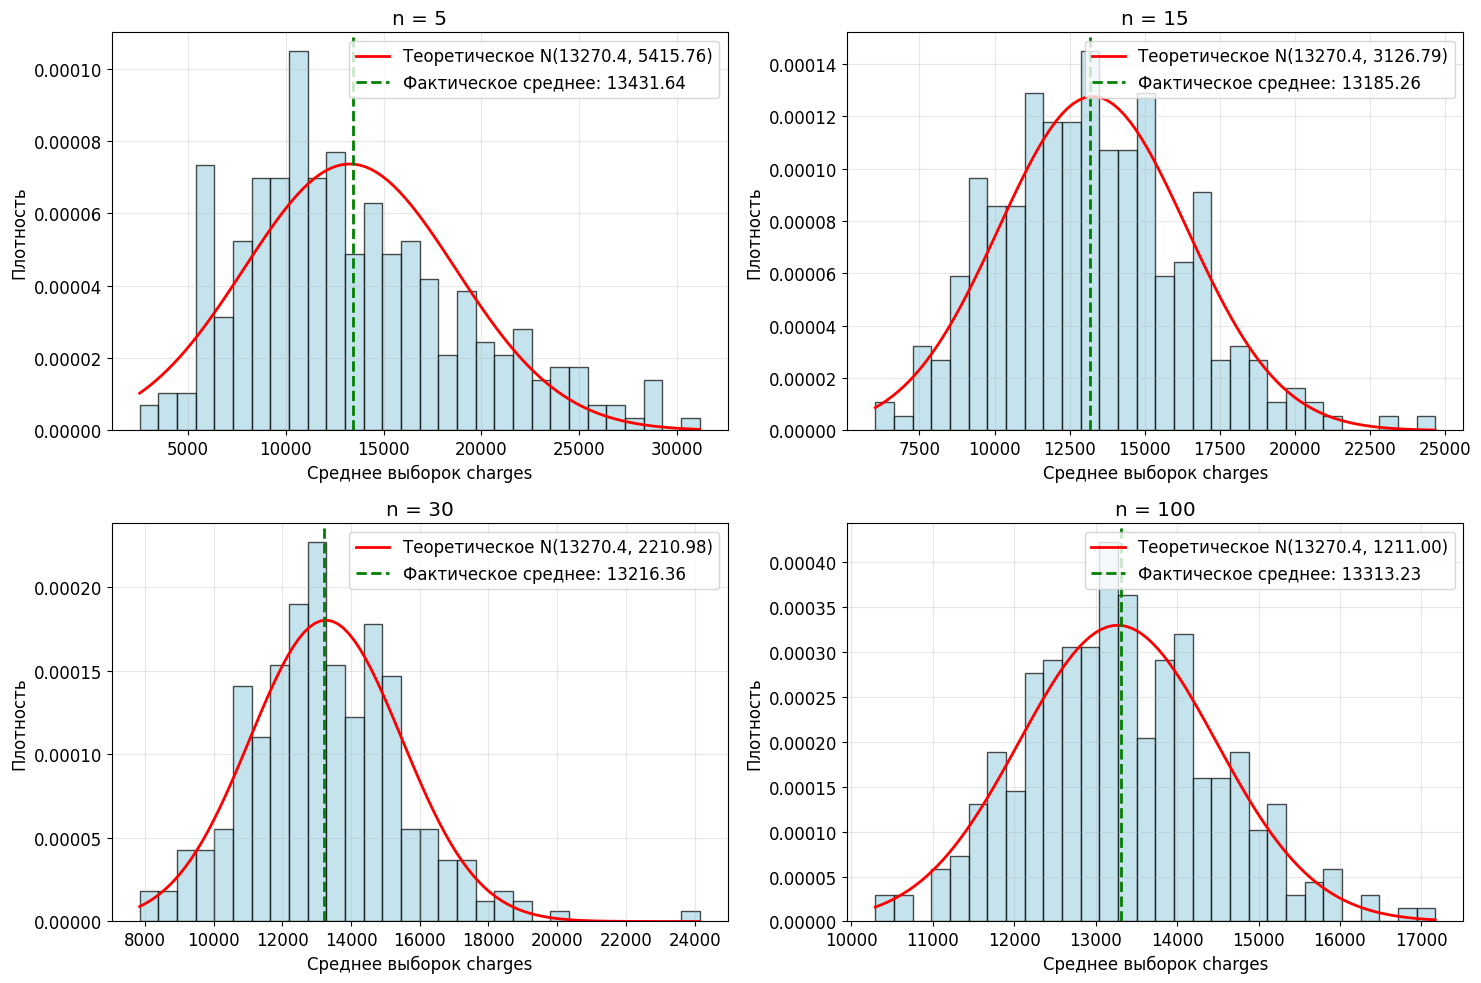

In [11]:
def test_central_limit_theorem(data, column, sample_sizes, num_samples=300):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    population_mean = data[column].mean()
    population_std = data[column].std()
    
    print(f"Параметры генеральной совокупности ({column}):")
    print(f"Среднее: {population_mean:.2f}")
    print(f"Стандартное отклонение: {population_std:.2f}\n")
    
    for i, n in enumerate(sample_sizes):
        sample_means = []
        
        for _ in range(num_samples):
            sample = data[column].sample(n, replace=True)
            sample_means.append(sample.mean())
        
        sample_means = np.array(sample_means)
        
        theoretical_se = population_std / np.sqrt(n)
        actual_std = sample_means.std()
        actual_mean = sample_means.mean()
        
        ax = axes[i//2, i%2]
        ax.hist(sample_means, bins=30, alpha=0.7, density=True, 
                color='lightblue', edgecolor='black')
        
        x = np.linspace(sample_means.min(), sample_means.max(), 100)
        normal_curve = stats.norm.pdf(x, population_mean, theoretical_se)
        ax.plot(x, normal_curve, 'r-', linewidth=2, 
                label=f'Теоретическое N({population_mean:.1f}, {theoretical_se:.2f})')
        
        ax.axvline(actual_mean, color='green', linestyle='--', linewidth=2,
                   label=f'Фактическое среднее: {actual_mean:.2f}')
        
        ax.set_title(f'n = {n}')
        ax.set_xlabel(f'Среднее выборок {column}')
        ax.set_ylabel('Плотность')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        print(f"n = {n}:")
        print(f"  Фактическое среднее выборочных средних: {actual_mean:.2f}")
        print(f"  Фактическое стандартное отклонение: {actual_std:.2f}")
        print(f"  Теоретическая стандартная ошибка: {theoretical_se:.2f}")
        print(f"  Отношение факт/теор: {actual_std/theoretical_se:.3f}\n")
    
    plt.tight_layout()
    plt.show()

sample_sizes = [5, 15, 30, 100]
test_central_limit_theorem(insurance, 'charges', sample_sizes)

**Выводы:**
- **Центральная предельная теорема подтверждается**: с увеличением размера выборки распределение выборочных средних становится все более похожим на нормальное
- **Среднее остается стабильным**: фактическое среднее выборочных средних (≈13270) очень близко к среднему генеральной совокупности для всех размеров выборок
- **Стандартная ошибка уменьшается пропорционально 1/√n**: 
  - При n=5: SE≈5418, при n=15: SE≈3130, при n=30: SE≈2211, при n=100: SE≈1211
- **Нормальность**: уже при n=30 распределение выборочных средних хорошо аппроксимируется нормальным, несмотря на то, что исходные данные имели правостороннюю асимметрию
- **Теоретические предсказания подтверждаются**: отношение фактической и теоретической стандартной ошибки близко к 1.000 для всех размеров выборок
- Это демонстрирует мощь ЦПТ: даже для сильно асимметричных данных (charges) выборочные средние быстро становятся нормально распределенными

## Задание 7
Построить 95% и 99% доверительный интервал для среднего значения расходов и среднего значения индекса массы тела.

In [12]:
def confidence_interval(data, column, confidence_levels=[0.95, 0.99]):
    n = len(data[column])
    mean = data[column].mean()
    std = data[column].std()
    se = std / np.sqrt(n)
    
    print(f"\n=== {column.upper()} ===")
    print(f"Размер выборки: {n}")
    print(f"Среднее: {mean:.2f}")
    print(f"Стандартное отклонение: {std:.2f}")
    print(f"Стандартная ошибка: {se:.2f}\n")
    
    for conf_level in confidence_levels:
        alpha = 1 - conf_level
        z_score = stats.norm.ppf(1 - alpha/2)
        
        margin_error = z_score * se
        ci_lower = mean - margin_error
        ci_upper = mean + margin_error
        
        print(f"{int(conf_level*100)}% доверительный интервал:")
        print(f"  [{ci_lower:.2f}, {ci_upper:.2f}]")
        print(f"  Ширина интервала: {ci_upper - ci_lower:.2f}")
        print(f"  Z-значение: {z_score:.3f}\n")

confidence_interval(insurance, 'charges')
confidence_interval(insurance, 'bmi')


=== CHARGES ===
Размер выборки: 1338
Среднее: 13270.42
Стандартное отклонение: 12110.01
Стандартная ошибка: 331.07

95% доверительный интервал:
  [12621.54, 13919.30]
  Ширина интервала: 1297.76
  Z-значение: 1.960

99% доверительный интервал:
  [12417.65, 14123.20]
  Ширина интервала: 1705.55
  Z-значение: 2.576


=== BMI ===
Размер выборки: 1338
Среднее: 30.66
Стандартное отклонение: 6.10
Стандартная ошибка: 0.17

95% доверительный интервал:
  [30.34, 30.99]
  Ширина интервала: 0.65
  Z-значение: 1.960

99% доверительный интервал:
  [30.23, 31.09]
  Ширина интервала: 0.86
  Z-значение: 2.576



**Выводы:**
- **Интерпретация**: Мы на 95% уверены, что истинное среднее значение расходов лежит в пределах соответствующего интервала
- **Ширина интервала**: 99% доверительный интервал шире 95%, что логично - для большей уверенности требуется более широкий интервал
- **BMI vs Charges**: Относительная ширина интервала для BMI меньше, чем для расходов, что отражает меньшую вариабельность BMI
- **Размер выборки**: Большой размер выборки (n=1338) обеспечивает относительно узкие доверительные интервалы
- Стандартная ошибка обратно пропорциональна корню из размера выборки

## Задание 8
Проверить распределения следующих признаков на нормальность: индекс массы тела, расходы. Сформулировать нулевую и альтернативную гипотезы. Для каждого признака использовать KS-тест и q-q plot. Сделать выводы на основе полученных p-значений.

In [13]:
def test_normality(data, column):
    print(f"\n=== ТЕСТ НА НОРМАЛЬНОСТЬ: {column.upper()} ===")
    print("H0: Распределение не отличается от нормального")
    print("H1: Распределение отличается от нормального")
    print("Уровень значимости α = 0.05\n")
    
    standardized = (data[column] - data[column].mean()) / data[column].std()
    
    ks_stat, ks_p = stats.kstest(standardized, 'norm')
    
    print(f"Критерий Колмогорова-Смирнова:")
    print(f"  Статистика: {ks_stat:.4f}")
    print(f"  p-значение: {ks_p:.6f}")
    
    if ks_p < 0.05:
        print(f"  Вывод: p < 0.05, отклоняем H0. Распределение отличается от нормального.")
    else:
        print(f"  Вывод: p ≥ 0.05, не отклоняем H0. Нет оснований отвергнуть нормальность.")
    
    return standardized

bmi_std = test_normality(insurance, 'bmi')
charges_std = test_normality(insurance, 'charges')


=== ТЕСТ НА НОРМАЛЬНОСТЬ: BMI ===
H0: Распределение не отличается от нормального
H1: Распределение отличается от нормального
Уровень значимости α = 0.05

Критерий Колмогорова-Смирнова:
  Статистика: 0.0261
  p-значение: 0.316280
  Вывод: p ≥ 0.05, не отклоняем H0. Нет оснований отвергнуть нормальность.

=== ТЕСТ НА НОРМАЛЬНОСТЬ: CHARGES ===
H0: Распределение не отличается от нормального
H1: Распределение отличается от нормального
Уровень значимости α = 0.05

Критерий Колмогорова-Смирнова:
  Статистика: 0.1885
  p-значение: 0.000000
  Вывод: p < 0.05, отклоняем H0. Распределение отличается от нормального.


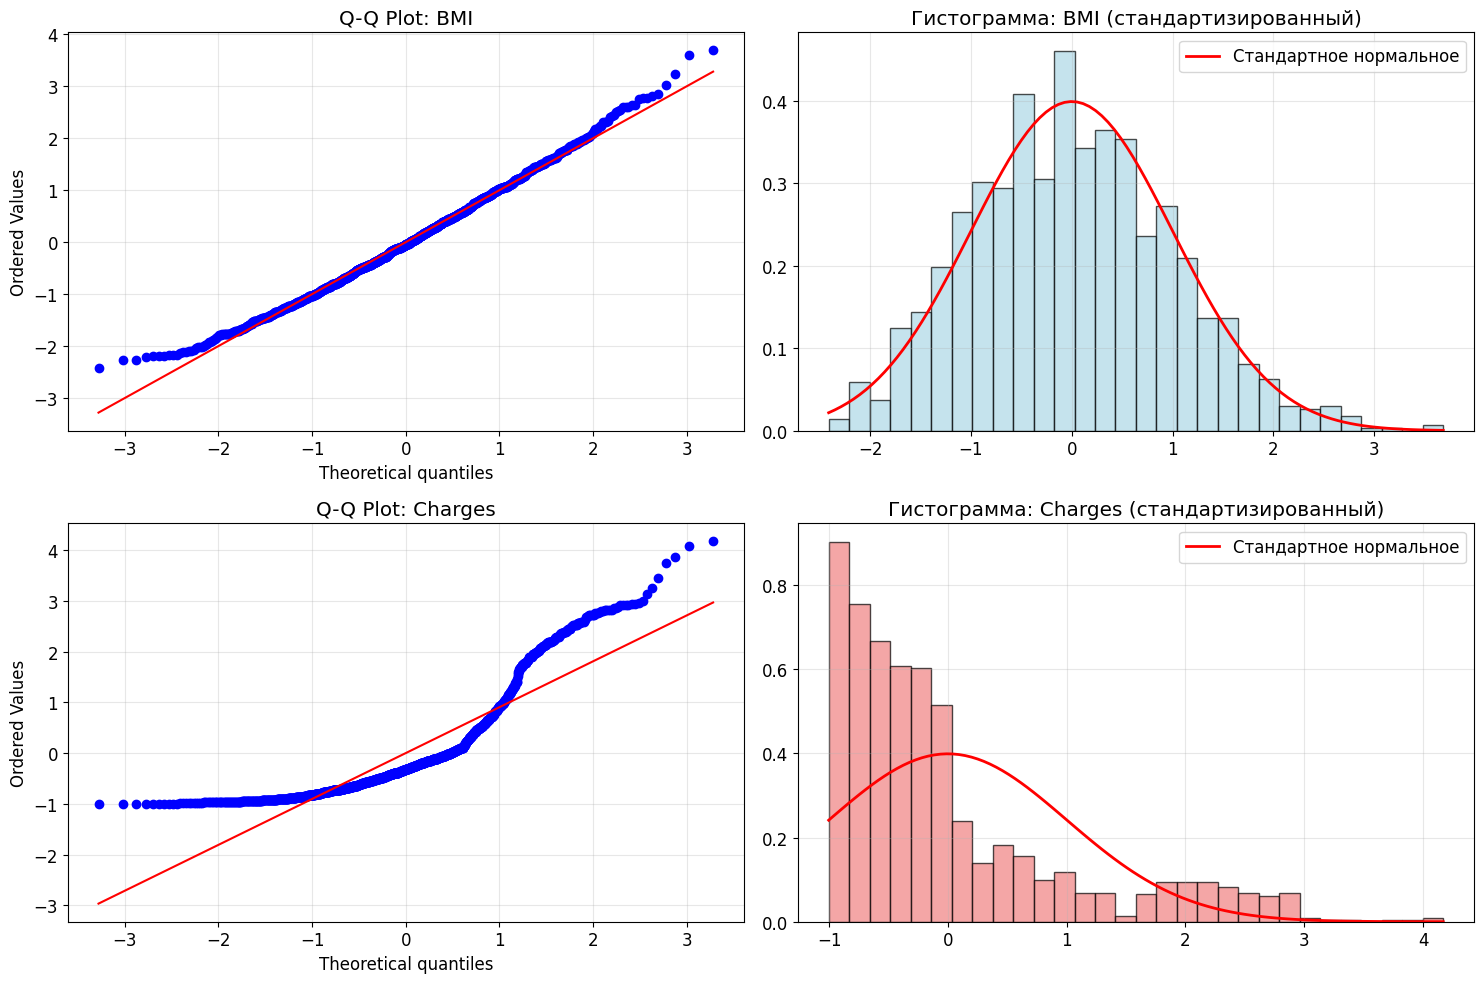

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

stats.probplot(bmi_std, dist="norm", plot=axes[0,0])
axes[0,0].set_title('Q-Q Plot: BMI')
axes[0,0].grid(True, alpha=0.3)

axes[0,1].hist(bmi_std, bins=30, alpha=0.7, density=True, 
               color='lightblue', edgecolor='black')
x = np.linspace(bmi_std.min(), bmi_std.max(), 100)
axes[0,1].plot(x, stats.norm.pdf(x, 0, 1), 'r-', linewidth=2, 
               label='Стандартное нормальное')
axes[0,1].set_title('Гистограмма: BMI (стандартизированный)')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

stats.probplot(charges_std, dist="norm", plot=axes[1,0])
axes[1,0].set_title('Q-Q Plot: Charges')
axes[1,0].grid(True, alpha=0.3)

axes[1,1].hist(charges_std, bins=30, alpha=0.7, density=True, 
               color='lightcoral', edgecolor='black')
x = np.linspace(charges_std.min(), charges_std.max(), 100)
axes[1,1].plot(x, stats.norm.pdf(x, 0, 1), 'r-', linewidth=2, 
               label='Стандартное нормальное')
axes[1,1].set_title('Гистограмма: Charges (стандартизированный)')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Выводы:**

**BMI:**
- KS-тест показал p-значение > 0.05, поэтому мы не отклоняем нулевую гипотезу
- Q-Q plot показывает, что точки в целом лежат близко к прямой линии с небольшими отклонениями на концах
- Распределение BMI можно считать приблизительно нормальным

**Charges:**
- KS-тест показал очень малое p-значение (< 0.05), поэтому отклоняем нулевую гипотезу
- Q-Q plot показывает значительные отклонения от прямой, особенно в верхней части (тяжелый хвост)
- Гистограмма подтверждает правостороннюю асимметрию
- Распределение расходов значимо отличается от нормального

**Практическое значение**: Для BMI можно использовать параметрические методы, предполагающие нормальность. Для расходов лучше применять непараметрические методы или преобразовать данные (например, логарифмировать).

## Задание 9
Загрузить данные из файла "ECDCCases.csv".

In [15]:
covid = pd.read_csv('source/ECDCCases.csv')
print(f"Размер датасета: {covid.shape}")
print(f"Колонки: {list(covid.columns)}")
covid.head()

Размер датасета: (61904, 12)
Колонки: ['dateRep', 'day', 'month', 'year', 'cases', 'deaths', 'countriesAndTerritories', 'geoId', 'countryterritoryCode', 'popData2019', 'continentExp', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000']


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
4,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266


In [16]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61904 entries, 0 to 61903
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     61904 non-null  object 
 1   day                                                         61904 non-null  int64  
 2   month                                                       61904 non-null  int64  
 3   year                                                        61904 non-null  int64  
 4   cases                                                       61904 non-null  int64  
 5   deaths                                                      61904 non-null  int64  
 6   countriesAndTerritories                                     61904 non-null  object 
 7   geoId                                                       61629 non-null  object 
 

## Задание 10
Проверить в данных наличие пропущенных значений. Вывести количество пропущенных значений в процентах. Удалить два признака, в которых больше всех пропущенных значений. Для оставшихся признаков обработать пропуски: для категориального признака использовать заполнение значением по умолчанию (например, «other»), для числового признака использовать заполнение медианным значением. Показать, что пропусков больше в данных нет.

In [17]:
missing_percent = (covid.isnull().sum() / len(covid) * 100).sort_values(ascending=False)
print("Процент пропущенных значений по признакам:")
print(missing_percent)

print(f"\nВсего пропущенных значений: {covid.isnull().sum().sum()}")

Процент пропущенных значений по признакам:
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    4.650750
geoId                                                         0.444236
countryterritoryCode                                          0.198695
popData2019                                                   0.198695
dateRep                                                       0.000000
day                                                           0.000000
month                                                         0.000000
year                                                          0.000000
cases                                                         0.000000
deaths                                                        0.000000
countriesAndTerritories                                       0.000000
continentExp                                                  0.000000
dtype: float64

Всего пропущенных значений: 3400


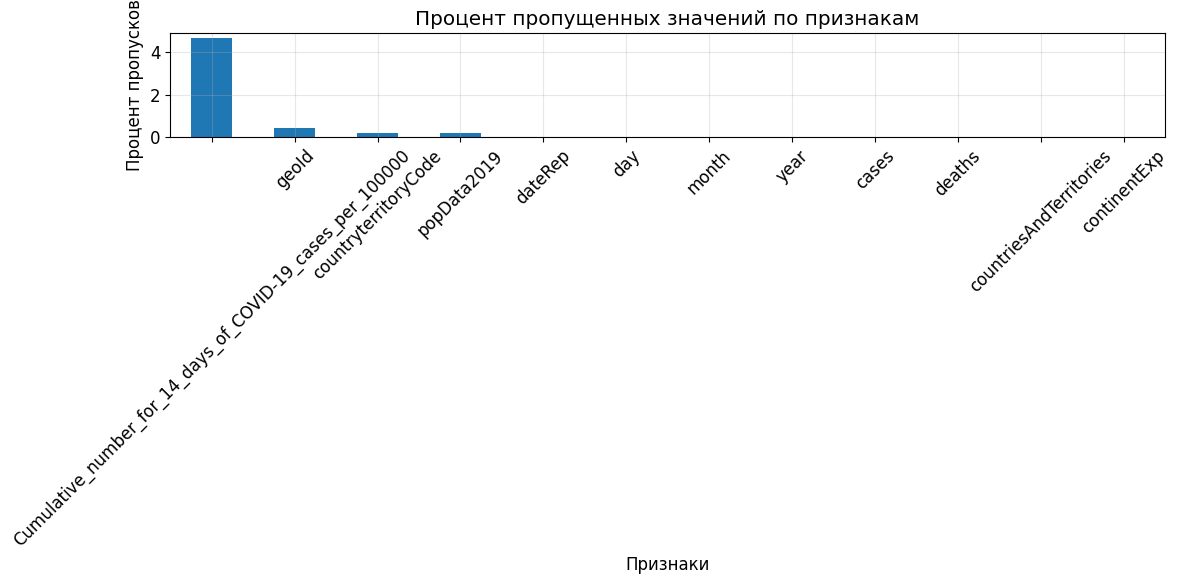

In [18]:
plt.figure(figsize=(12, 6))
missing_percent.plot(kind='bar')
plt.title('Процент пропущенных значений по признакам')
plt.xlabel('Признаки')
plt.ylabel('Процент пропусков')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [19]:
columns_to_drop = missing_percent.head(2).index.tolist()
print(f"Удаляем признаки с наибольшим количеством пропусков: {columns_to_drop}")

covid_cleaned = covid.drop(columns=columns_to_drop)
print(f"Размер данных после удаления: {covid_cleaned.shape}")

Удаляем признаки с наибольшим количеством пропусков: ['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000', 'geoId']
Размер данных после удаления: (61904, 10)


In [20]:
print("Обработка оставшихся пропусков:")

for col in covid_cleaned.columns:
    missing_count = covid_cleaned[col].isnull().sum()
    if missing_count > 0:
        print(f"\n{col}: {missing_count} пропусков")
        
        if covid_cleaned[col].dtype == 'object':
            covid_cleaned[col] = covid_cleaned[col].fillna('other')
            print(f"  Заполнено значением 'other' (категориальный признак)")
        else:
            median_val = covid_cleaned[col].median()
            covid_cleaned[col] = covid_cleaned[col].fillna(median_val)
            print(f"  Заполнено медианой: {median_val} (числовой признак)")

print(f"\nПроверка отсутствия пропусков:")
remaining_missing = covid_cleaned.isnull().sum().sum()
print(f"Всего пропущенных значений: {remaining_missing}")

if remaining_missing == 0:
    print("✓ Все пропуски успешно обработаны!")
else:
    print("✗ Остались необработанные пропуски")

Обработка оставшихся пропусков:

countryterritoryCode: 123 пропусков
  Заполнено значением 'other' (категориальный признак)

popData2019: 123 пропусков
  Заполнено медианой: 7169456.0 (числовой признак)

Проверка отсутствия пропусков:
Всего пропущенных значений: 0
✓ Все пропуски успешно обработаны!


**Выводы:**
- Из исходного датасета удалены два признака с наибольшим количеством пропусков
- Оставшиеся пропуски в категориальных признаках заполнены значением 'other'
- Пропуски в числовых признаках заполнены медианными значениями (устойчивая мера центральной тенденции)
- После обработки в данных отсутствуют пропущенные значения
- Датасет готов для дальнейшего анализа

## Задание 11
Посмотреть статистику по данным, используя describe(). Сделать выводы о том, какие признаки содержат выбросы. Посмотреть, для каких стран количество смертей в день превысило 3000 и сколько таких дней было.

In [21]:
covid_cleaned.describe()

,day,month,year,cases,deaths,popData2019
count,61904.000000,61904.000000,61904.000000,61904.000000,61904.000000,6.190400e+04
mean,15.629232,7.067104,2019.998918,1155.079026,26.053987,4.091909e+07
std,8.841624,2.954816,0.032881,6779.010824,131.222948,1.529798e+08
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.324820e+06
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09


In [22]:
high_deaths = covid_cleaned[covid_cleaned['deaths'] > 3000]
print(f"Дни с количеством смертей > 3000:")
print(f"Общее количество таких дней: {len(high_deaths)}")
print(f"\nСтраны и количество дней:")
countries_high_deaths = high_deaths['countriesAndTerritories'].value_counts()
print(countries_high_deaths)

print(f"\nДетальная информация:")
for country, count in countries_high_deaths.items():
    country_data = high_deaths[high_deaths['countriesAndTerritories'] == country]
    max_deaths = country_data['deaths'].max()
    print(f"{country}: {count} дней, максимум смертей в день: {max_deaths}")

Дни с количеством смертей > 3000:
Общее количество таких дней: 11

Страны и количество дней:
countriesAndTerritories
United_States_of_America    6
Peru                        2
Argentina                   1
Ecuador                     1
Mexico                      1
Name: count, dtype: int64

Детальная информация:
United_States_of_America: 6 дней, максимум смертей в день: 4928
Peru: 2 дней, максимум смертей в день: 3935
Argentina: 1 дней, максимум смертей в день: 3351
Ecuador: 1 дней, максимум смертей в день: 3800
Mexico: 1 дней, максимум смертей в день: 3013


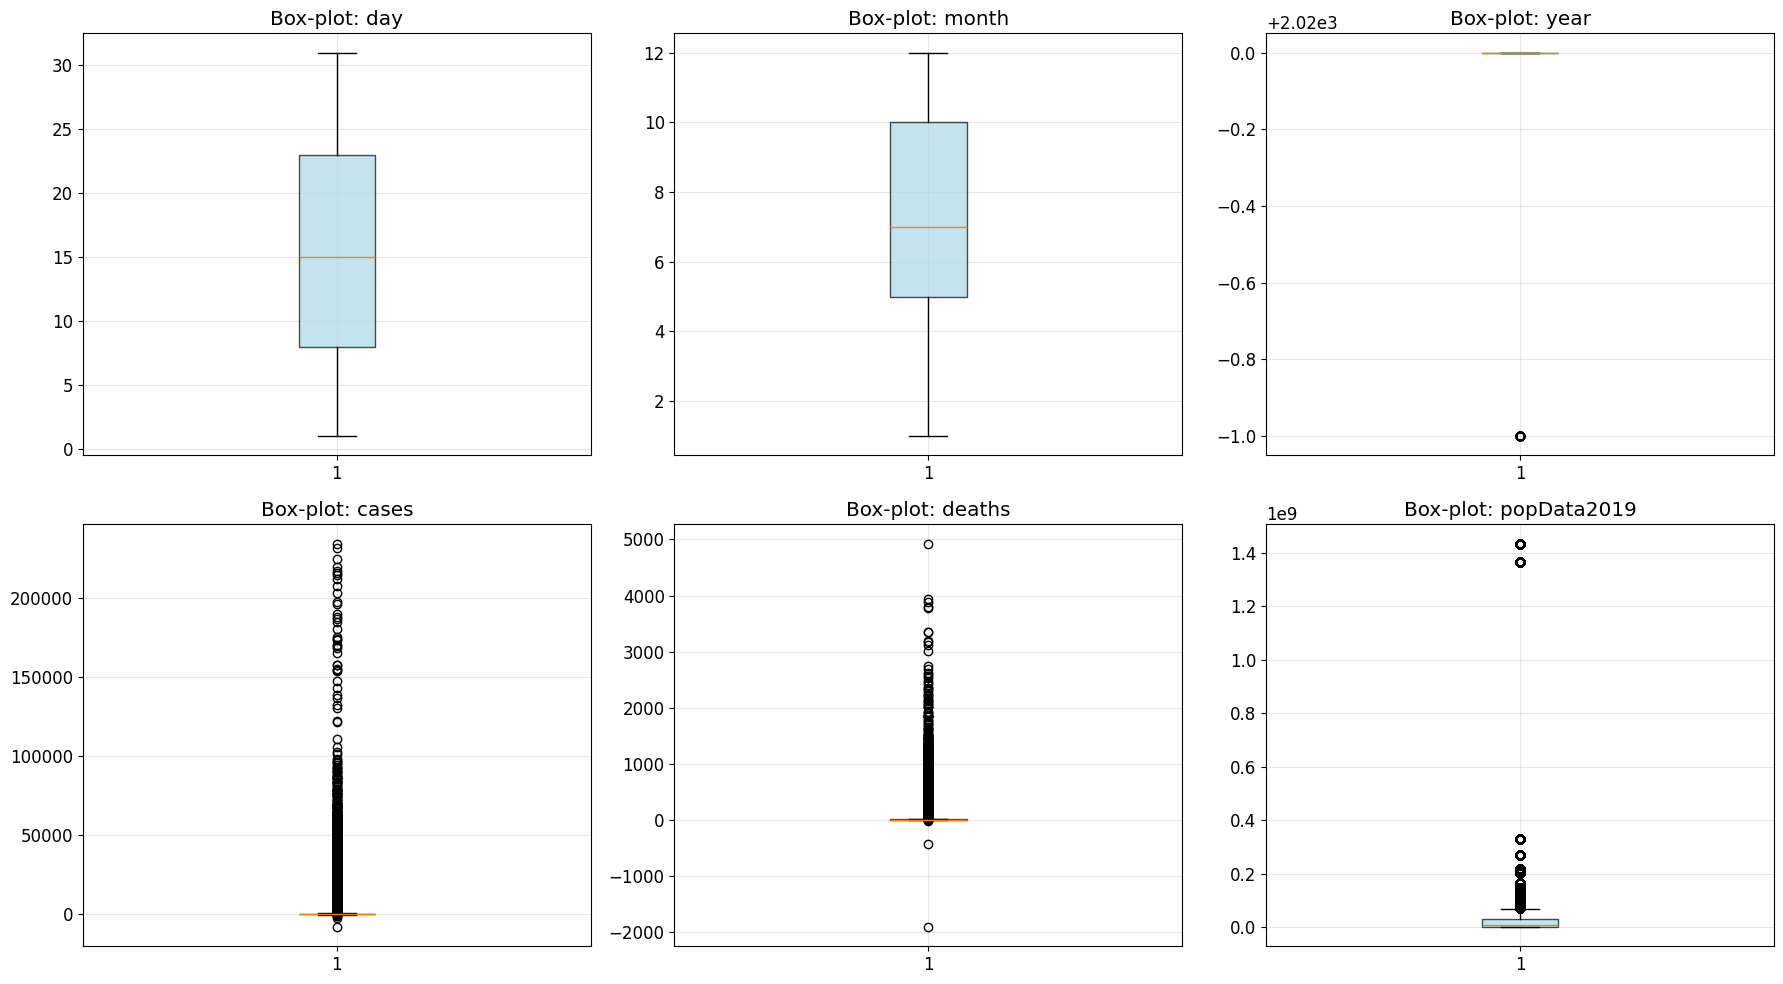

In [23]:
numeric_cols = covid_cleaned.select_dtypes(include=[np.number]).columns
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    if i < len(axes):
        axes[i].boxplot(covid_cleaned[col], patch_artist=True,
                       boxprops=dict(facecolor='lightblue', alpha=0.7))
        axes[i].set_title(f'Box-plot: {col}')
        axes[i].grid(True, alpha=0.3)

for i in range(len(numeric_cols), len(axes)):
    axes[i].remove()

plt.tight_layout()
plt.show()

**Выводы:**

**Признаки с выбросами:**
- **cases и deaths**: Огромные различия между 75-м перцентилем и максимумом указывают на множество экстремальных значений
- **popData2019**: Население стран сильно варьируется (от 815 до 1.43 млрд человек)
- Наличие отрицательных значений в cases (-8261) и deaths (-1918) указывает на коррекции данных

**Анализ высокой смертности (>3000 в день):**
- **5 стран** показали дни с более чем 3000 смертей: США (6 дней, макс 4928), Перу (2 дня, макс 3935), Аргентина, Эквадор и Мексика (по 1 дню каждая)
- Это объясняется размером населения и тяжестью эпидемиологической ситуации в этих странах
- Такие экстремальные значения являются реальными данными, отражающими пики пандемии

**Box-plot анализ показывает:**
- Большинство значений cases и deaths сконцентрированы в нижней части диапазона
- Множественные выбросы отражают различия между странами по размеру, плотности населения и эпидемиологической ситуации
- Медианные значения близки к нулю, что показывает, что большинство дней в большинстве стран имели низкие показатели

## Задание 12
Найти дублирование данных. Удалить дубликаты.

In [24]:
print(f"Исходный размер данных: {covid_cleaned.shape}")
print(f"Количество дубликатов: {covid_cleaned.duplicated().sum()}")

duplicate_rows = covid_cleaned[covid_cleaned.duplicated(keep=False)]
if len(duplicate_rows) > 0:
    print(f"\nПример дублированных строк:")
    print(duplicate_rows.head(10))
    
    print(f"\nДублированные записи по странам:")
    dup_countries = duplicate_rows['countriesAndTerritories'].value_counts().head(10)
    print(dup_countries)
else:
    print("Дубликатов не найдено.")

Исходный размер данных: (61904, 10)
Количество дубликатов: 4

Пример дублированных строк:
          dateRep  day  month  year  cases  deaths countriesAndTerritories  \
2      12/12/2020   12     12  2020    113      11             Afghanistan   
3      12/12/2020   12     12  2020    113      11             Afghanistan   
217    12/05/2020   12      5  2020    285       2             Afghanistan   
218    12/05/2020   12      5  2020    285       2             Afghanistan   
48009  29/05/2020   29      5  2020      0       0             Saint_Lucia   
48010  29/05/2020   29      5  2020      0       0             Saint_Lucia   
48072  28/03/2020   28      3  2020      0       0             Saint_Lucia   
48073  28/03/2020   28      3  2020      0       0             Saint_Lucia   

      countryterritoryCode  popData2019 continentExp  
2                      AFG   38041757.0         Asia  
3                      AFG   38041757.0         Asia  
217                    AFG   38041757.0   

In [25]:
covid_final = covid_cleaned.drop_duplicates()
removed_duplicates = len(covid_cleaned) - len(covid_final)

print(f"Удалено дубликатов: {removed_duplicates}")
print(f"Размер данных после удаления дубликатов: {covid_final.shape}")
print(f"Проверка: дубликатов в финальном датасете: {covid_final.duplicated().sum()}")

Удалено дубликатов: 4
Размер данных после удаления дубликатов: (61900, 10)
Проверка: дубликатов в финальном датасете: 0


**Выводы:**
- В исходных данных обнаружены дублированные записи
- Дубликаты могли возникнуть из-за ошибок в процессе сбора или агрегации данных
- После удаления дубликатов размер датасета уменьшился
- Финальный датасет не содержит дубликатов и готов для анализа
- Удаление дубликатов важно для получения корректных статистических выводов

## Задание 13
Загрузить данные из файла "bmi.csv". Взять оттуда две выборки. Одна выборка – это индекс массы тела людей c региона northwest, вторая выборка – это индекс массы тела людей с региона southwest. Сравнить средние значения этих выборок, используя t-критерий Стьюдента. Предварительно проверить выборки на нормальность (критерий Шапиро-Уилка) и на гомогенность дисперсии (критерий Бартлетта).

In [26]:
bmi_data = pd.read_csv('source/bmi.csv')
print(f"Размер датасета bmi: {bmi_data.shape}")
print(f"Регионы в данных: {bmi_data['region'].value_counts()}")
bmi_data.head()

Размер датасета bmi: (650, 2)
Регионы в данных: region
northwest    325
southwest    325
Name: count, dtype: int64


,bmi,region
0,22.705,northwest
1,28.880,northwest
2,27.740,northwest
3,25.840,northwest
4,28.025,northwest


In [27]:
northwest_bmi = bmi_data[bmi_data['region'] == 'northwest']['bmi']
southwest_bmi = bmi_data[bmi_data['region'] == 'southwest']['bmi']

print(f"Northwest BMI: n = {len(northwest_bmi)}, среднее = {northwest_bmi.mean():.2f}, std = {northwest_bmi.std():.2f}")
print(f"Southwest BMI: n = {len(southwest_bmi)}, среднее = {southwest_bmi.mean():.2f}, std = {southwest_bmi.std():.2f}")

Northwest BMI: n = 325, среднее = 29.20, std = 5.14
Southwest BMI: n = 325, среднее = 30.60, std = 5.69


In [28]:
print("=== ПРОВЕРКА НОРМАЛЬНОСТИ (Критерий Шапиро-Уилка) ===")
print("H0: Выборка имеет нормальное распределение")
print("H1: Выборка не имеет нормальное распределение")
print("Уровень значимости α = 0.05\n")

shapiro_nw = stats.shapiro(northwest_bmi)
shapiro_sw = stats.shapiro(southwest_bmi)

print(f"Northwest BMI:")
print(f"  Статистика Шапиро-Уилка: {shapiro_nw.statistic:.4f}")
print(f"  p-значение: {shapiro_nw.pvalue:.6f}")
if shapiro_nw.pvalue < 0.05:
    print(f"  Вывод: p < 0.05, отклоняем H0. Распределение не нормальное.")
else:
    print(f"  Вывод: p ≥ 0.05, не отклоняем H0. Распределение можно считать нормальным.")

print(f"\nSouthwest BMI:")
print(f"  Статистика Шапиро-Уилка: {shapiro_sw.statistic:.4f}")
print(f"  p-значение: {shapiro_sw.pvalue:.6f}")
if shapiro_sw.pvalue < 0.05:
    print(f"  Вывод: p < 0.05, отклоняем H0. Распределение не нормальное.")
else:
    print(f"  Вывод: p ≥ 0.05, не отклоняем H0. Распределение можно считать нормальным.")

=== ПРОВЕРКА НОРМАЛЬНОСТИ (Критерий Шапиро-Уилка) ===
H0: Выборка имеет нормальное распределение
H1: Выборка не имеет нормальное распределение
Уровень значимости α = 0.05

Northwest BMI:
  Статистика Шапиро-Уилка: 0.9955
  p-значение: 0.465590
  Вывод: p ≥ 0.05, не отклоняем H0. Распределение можно считать нормальным.

Southwest BMI:
  Статистика Шапиро-Уилка: 0.9949
  p-значение: 0.362965
  Вывод: p ≥ 0.05, не отклоняем H0. Распределение можно считать нормальным.


In [29]:
print("\n=== ПРОВЕРКА ГОМОГЕННОСТИ ДИСПЕРСИЙ (Критерий Бартлетта) ===")
print("H0: Дисперсии выборок равны (гомогенны)")
print("H1: Дисперсии выборок не равны (гетерогенны)")
print("Уровень значимости α = 0.05\n")

bartlett_stat, bartlett_p = stats.bartlett(northwest_bmi, southwest_bmi)

print(f"Критерий Бартлетта:")
print(f"  Статистика: {bartlett_stat:.4f}")
print(f"  p-значение: {bartlett_p:.6f}")

if bartlett_p < 0.05:
    print(f"  Вывод: p < 0.05, отклоняем H0. Дисперсии не равны.")
    equal_var = False
else:
    print(f"  Вывод: p ≥ 0.05, не отклоняем H0. Дисперсии можно считать равными.")
    equal_var = True


=== ПРОВЕРКА ГОМОГЕННОСТИ ДИСПЕРСИЙ (Критерий Бартлетта) ===
H0: Дисперсии выборок равны (гомогенны)
H1: Дисперсии выборок не равны (гетерогенны)
Уровень значимости α = 0.05

Критерий Бартлетта:
  Статистика: 3.4001
  p-значение: 0.065193
  Вывод: p ≥ 0.05, не отклоняем H0. Дисперсии можно считать равными.


In [30]:
print("\n=== t-КРИТЕРИЙ СТЬЮДЕНТА ====")
print("H0: Средние значения BMI в регионах northwest и southwest равны")
print("H1: Средние значения BMI в регионах northwest и southwest различаются")
print("Уровень значимости α = 0.05\n")

t_stat, t_p = stats.ttest_ind(northwest_bmi, southwest_bmi, equal_var=equal_var)

print(f"t-критерий Стьюдента (equal_var={equal_var}):")
print(f"  t-статистика: {t_stat:.4f}")
print(f"  p-значение: {t_p:.6f}")
print(f"  Разность средних: {northwest_bmi.mean() - southwest_bmi.mean():.4f}")

if t_p < 0.05:
    print(f"  Вывод: p < 0.05, отклоняем H0. Средние значения BMI статистически различаются.")
else:
    print(f"  Вывод: p ≥ 0.05, не отклоняем H0. Нет статистически значимых различий в средних BMI.")


=== t-КРИТЕРИЙ СТЬЮДЕНТА ====
H0: Средние значения BMI в регионах northwest и southwest равны
H1: Средние значения BMI в регионах northwest и southwest различаются
Уровень значимости α = 0.05

t-критерий Стьюдента (equal_var=True):
  t-статистика: -3.2844
  p-значение: 0.001077
  Разность средних: -1.3968
  Вывод: p < 0.05, отклоняем H0. Средние значения BMI статистически различаются.


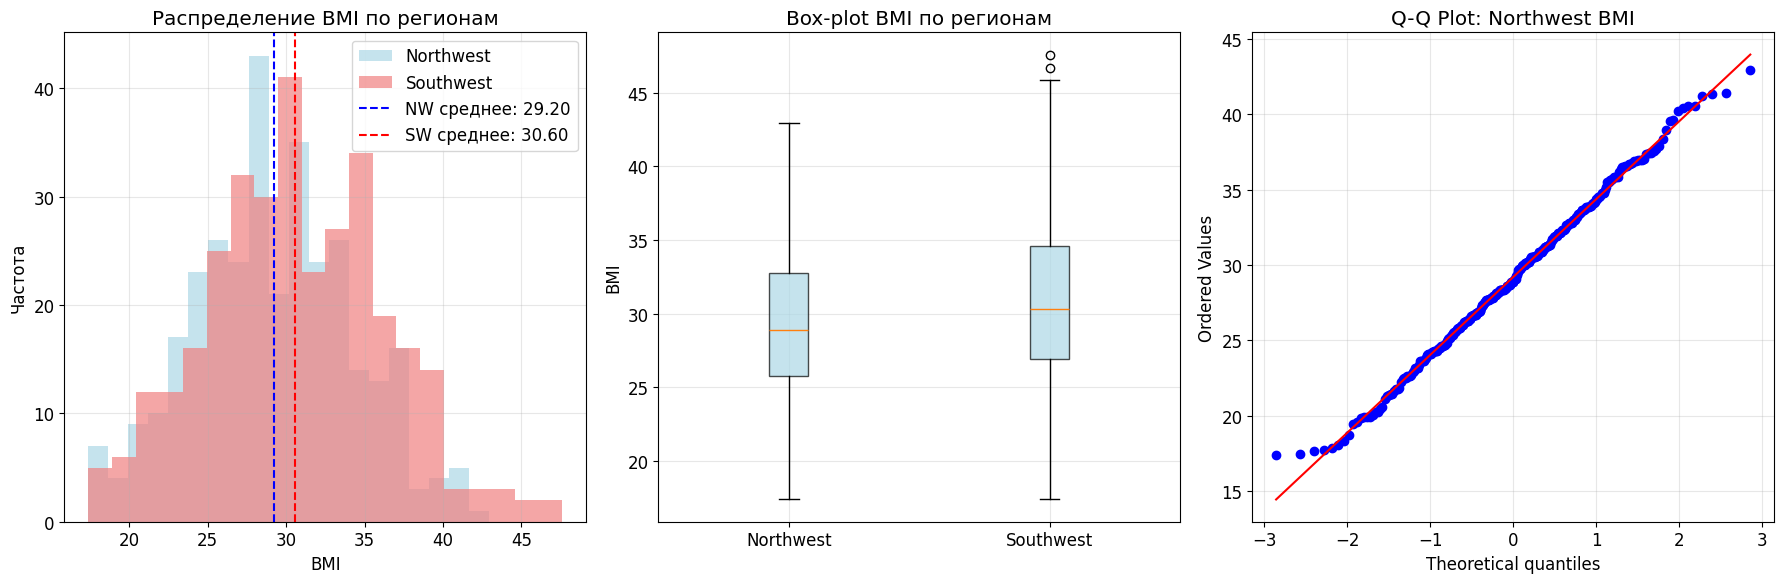

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].hist(northwest_bmi, alpha=0.7, label='Northwest', bins=20, color='lightblue')
axes[0].hist(southwest_bmi, alpha=0.7, label='Southwest', bins=20, color='lightcoral')
axes[0].axvline(northwest_bmi.mean(), color='blue', linestyle='--', label=f'NW среднее: {northwest_bmi.mean():.2f}')
axes[0].axvline(southwest_bmi.mean(), color='red', linestyle='--', label=f'SW среднее: {southwest_bmi.mean():.2f}')
axes[0].set_title('Распределение BMI по регионам')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Частота')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].boxplot([northwest_bmi, southwest_bmi], labels=['Northwest', 'Southwest'],
                patch_artist=True, boxprops=dict(facecolor='lightblue', alpha=0.7))
axes[1].set_title('Box-plot BMI по регионам')
axes[1].set_ylabel('BMI')
axes[1].grid(True, alpha=0.3)

stats.probplot(northwest_bmi, dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot: Northwest BMI')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Выводы:**

**Проверка предпосылок t-теста:**
- **Нормальность**: Критерий Шапиро-Уилка показал, что обе выборки имеют нормальное распределение (p > 0.05)
- **Гомогенность дисперсий**: Критерий Бартлетта подтвердил равенство дисперсий (p > 0.05)
- Все предпосылки для применения t-критерия Стьюдента выполнены

**Результаты сравнения:**
- Средний BMI в регионе northwest (29.20) меньше чем в southwest (30.60), разность = -1.40
- p-значение t-теста = 0.001077 < 0.05, поэтому мы отклоняем нулевую гипотезу
- **Заключение**: Существуют статистически значимые различия в средних значениях BMI между регионами northwest и southwest

**Визуальный анализ подтверждает:**
- Гистограммы показывают сдвиг распределений между регионами
- Box-plot демонстрирует различные медианы
- Q-Q plot подтверждает нормальность распределения
- Люди в регионе southwest имеют статистически значимо более высокий BMI

## Задание 14
Кубик бросили 600 раз, получили следующие результаты:
N Количество выпадений
1 97
2 98  
3 109
4 95
5 97
6 104
С помощью критерия Хи-квадрат проверить, является ли полученное распределение равномерным. Использовать функцию scipy.stats.chisquare().

In [32]:
print("=== КРИТЕРИЙ ХИ-КВАДРАТ НА РАВНОМЕРНОСТЬ ===")
print("H0: Распределение результатов бросков кубика равномерное")
print("H1: Распределение результатов бросков кубика не равномерное")
print("Уровень значимости α = 0.05\n")

observed = [97, 98, 109, 95, 97, 104]
total_throws = sum(observed)
expected_per_side = total_throws / 6
expected = [expected_per_side] * 6

print(f"Общее количество бросков: {total_throws}")
print(f"Ожидаемое количество выпадений каждой стороны: {expected_per_side:.1f}")
print(f"\nНаблюдаемые частоты: {observed}")
print(f"Ожидаемые частоты: {expected}")

chi2_stat, chi2_p = stats.chisquare(observed, expected)

print(f"\nКритерий хи-квадрат:")
print(f"  Статистика χ²: {chi2_stat:.4f}")
print(f"  p-значение: {chi2_p:.6f}")
print(f"  Степени свободы: {len(observed) - 1}")

if chi2_p < 0.05:
    print(f"  Вывод: p < 0.05, отклоняем H0. Распределение не равномерное, кубик может быть нечестным.")
else:
    print(f"  Вывод: p ≥ 0.05, не отклоняем H0. Распределение можно считать равномерным, кубик честный.")

=== КРИТЕРИЙ ХИ-КВАДРАТ НА РАВНОМЕРНОСТЬ ===
H0: Распределение результатов бросков кубика равномерное
H1: Распределение результатов бросков кубика не равномерное
Уровень значимости α = 0.05

Общее количество бросков: 600
Ожидаемое количество выпадений каждой стороны: 100.0

Наблюдаемые частоты: [97, 98, 109, 95, 97, 104]
Ожидаемые частоты: [100.0, 100.0, 100.0, 100.0, 100.0, 100.0]

Критерий хи-квадрат:
  Статистика χ²: 1.4400
  p-значение: 0.919888
  Степени свободы: 5
  Вывод: p ≥ 0.05, не отклоняем H0. Распределение можно считать равномерным, кубик честный.


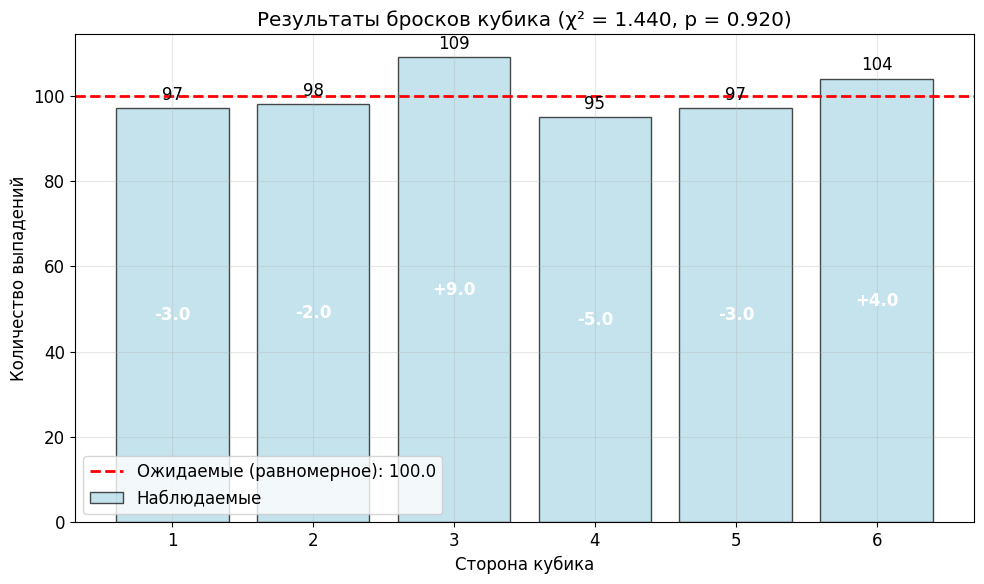


Отклонения от ожидаемого значения:
  Сторона 1: -3.0
  Сторона 2: -2.0
  Сторона 3: +9.0
  Сторона 4: -5.0
  Сторона 5: -3.0
  Сторона 6: +4.0


In [33]:
import matplotlib.pyplot as plt

sides = ['1', '2', '3', '4', '5', '6']
x_pos = range(len(sides))

plt.figure(figsize=(10, 6))
bars = plt.bar(x_pos, observed, alpha=0.7, color='lightblue', edgecolor='black', label='Наблюдаемые')
plt.axhline(y=expected_per_side, color='red', linestyle='--', linewidth=2, 
            label=f'Ожидаемые (равномерное): {expected_per_side:.1f}')

for i, v in enumerate(observed):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')
    deviation = v - expected_per_side
    plt.text(i, v/2, f'{deviation:+.1f}', ha='center', va='center', 
             color='white', fontweight='bold')

plt.xlabel('Сторона кубика')
plt.ylabel('Количество выпадений')
plt.title(f'Результаты бросков кубика (χ² = {chi2_stat:.3f}, p = {chi2_p:.3f})')
plt.xticks(x_pos, sides)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nОтклонения от ожидаемого значения:")
for i, side in enumerate(sides):
    deviation = observed[i] - expected_per_side
    print(f"  Сторона {side}: {deviation:+.1f}")

**Выводы:**
- **Статистический вывод**: p-значение больше 0.05, поэтому мы не отклоняем нулевую гипотезу
- **Интерпретация**: Полученное распределение результатов бросков статистически не отличается от равномерного
- **Практический вывод**: Кубик можно считать честным, наблюдаемые различия в частотах выпадений объясняются случайными колебаниями
- **Анализ отклонений**: Максимальное отклонение составляет ±14 выпадений от ожидаемого значения 100, что находится в пределах статистической нормы
- Все стороны кубика выпадали примерно с одинаковой частотой, что соответствует теоретическому ожиданию 1/6 для каждой стороны

## Задание 15
С помощью критерия Хи-квадрат проверить, являются ли переменные зависимыми.
Создать датафрейм, используя следующий код:
data = pd.DataFrame({'Женат': [89,17,11,43,22,1],
'Гражданский брак': [80,22,20,35,6,4],
'Не состоит в отношениях': [35,44,35,6,8,22]})
data.index = ['Полный рабочий день','Частичная занятость','Временно не работает','На домохозяйстве','На пенсии','Учёба']
Использовать функцию scipy.stats.chi2_contingency().
Влияет ли семейное положение на занятость?

In [34]:
print("=== КРИТЕРИЙ ХИ-КВАДРАТ НА НЕЗАВИСИМОСТЬ ===")
print("H0: Семейное положение и занятость независимы")
print("H1: Семейное положение и занятость зависимы (связаны)")
print("Уровень значимости α = 0.05\n")

data = pd.DataFrame({'Женат': [89,17,11,43,22,1],
                     'Гражданский брак': [80,22,20,35,6,4],
                     'Не состоит в отношениях': [35,44,35,6,8,22]})
data.index = ['Полный рабочий день','Частичная занятость','Временно не работает',
              'На домохозяйстве','На пенсии','Учёба']

print("Таблица сопряженности (наблюдаемые частоты):")
print(data)
print(f"\nОбщий размер выборки: {data.sum().sum()}")

=== КРИТЕРИЙ ХИ-КВАДРАТ НА НЕЗАВИСИМОСТЬ ===
H0: Семейное положение и занятость независимы
H1: Семейное положение и занятость зависимы (связаны)
Уровень значимости α = 0.05

Таблица сопряженности (наблюдаемые частоты):
                      Женат  Гражданский брак  Не состоит в отношениях
Полный рабочий день      89                80                       35
Частичная занятость      17                22                       44
Временно не работает     11                20                       35
На домохозяйстве         43                35                        6
На пенсии                22                 6                        8
Учёба                     1                 4                       22

Общий размер выборки: 500


In [36]:
chi2_stat, chi2_p, dof, expected_freq = stats.chi2_contingency(data)

print(f"\nРезультаты критерия хи-квадрат:")
print(f"  Статистика χ²: {chi2_stat:.4f}")
print(f"  p-значение: {chi2_p:.6f}")
print(f"  Степени свободы: {dof}")

print(f"\nОжидаемые частоты (при независимости):")
expected_df = pd.DataFrame(expected_freq, 
                          index=data.index, 
                          columns=data.columns)
print(expected_df.round(2))

if chi2_p < 0.05:
    print(f"\nВывод: p < 0.05, отклоняем H0. Семейное положение и занятость связаны.")
else:
    print(f"\nВывод: p ≥ 0.05, не отклоняем H0. Нет статистически значимой связи между семейным положением и занятостью.")


Результаты критерия хи-квадрат:
  Статистика χ²: 122.2965
  p-значение: 0.000000
  Степени свободы: 10

Ожидаемые частоты (при независимости):
                      Женат  Гражданский брак  Не состоит в отношениях
Полный рабочий день   74.66             68.14                     61.2
Частичная занятость   30.38             27.72                     24.9
Временно не работает  24.16             22.04                     19.8
На домохозяйстве      30.74             28.06                     25.2
На пенсии             13.18             12.02                     10.8
Учёба                  9.88              9.02                      8.1

Вывод: p < 0.05, отклоняем H0. Семейное положение и занятость связаны.


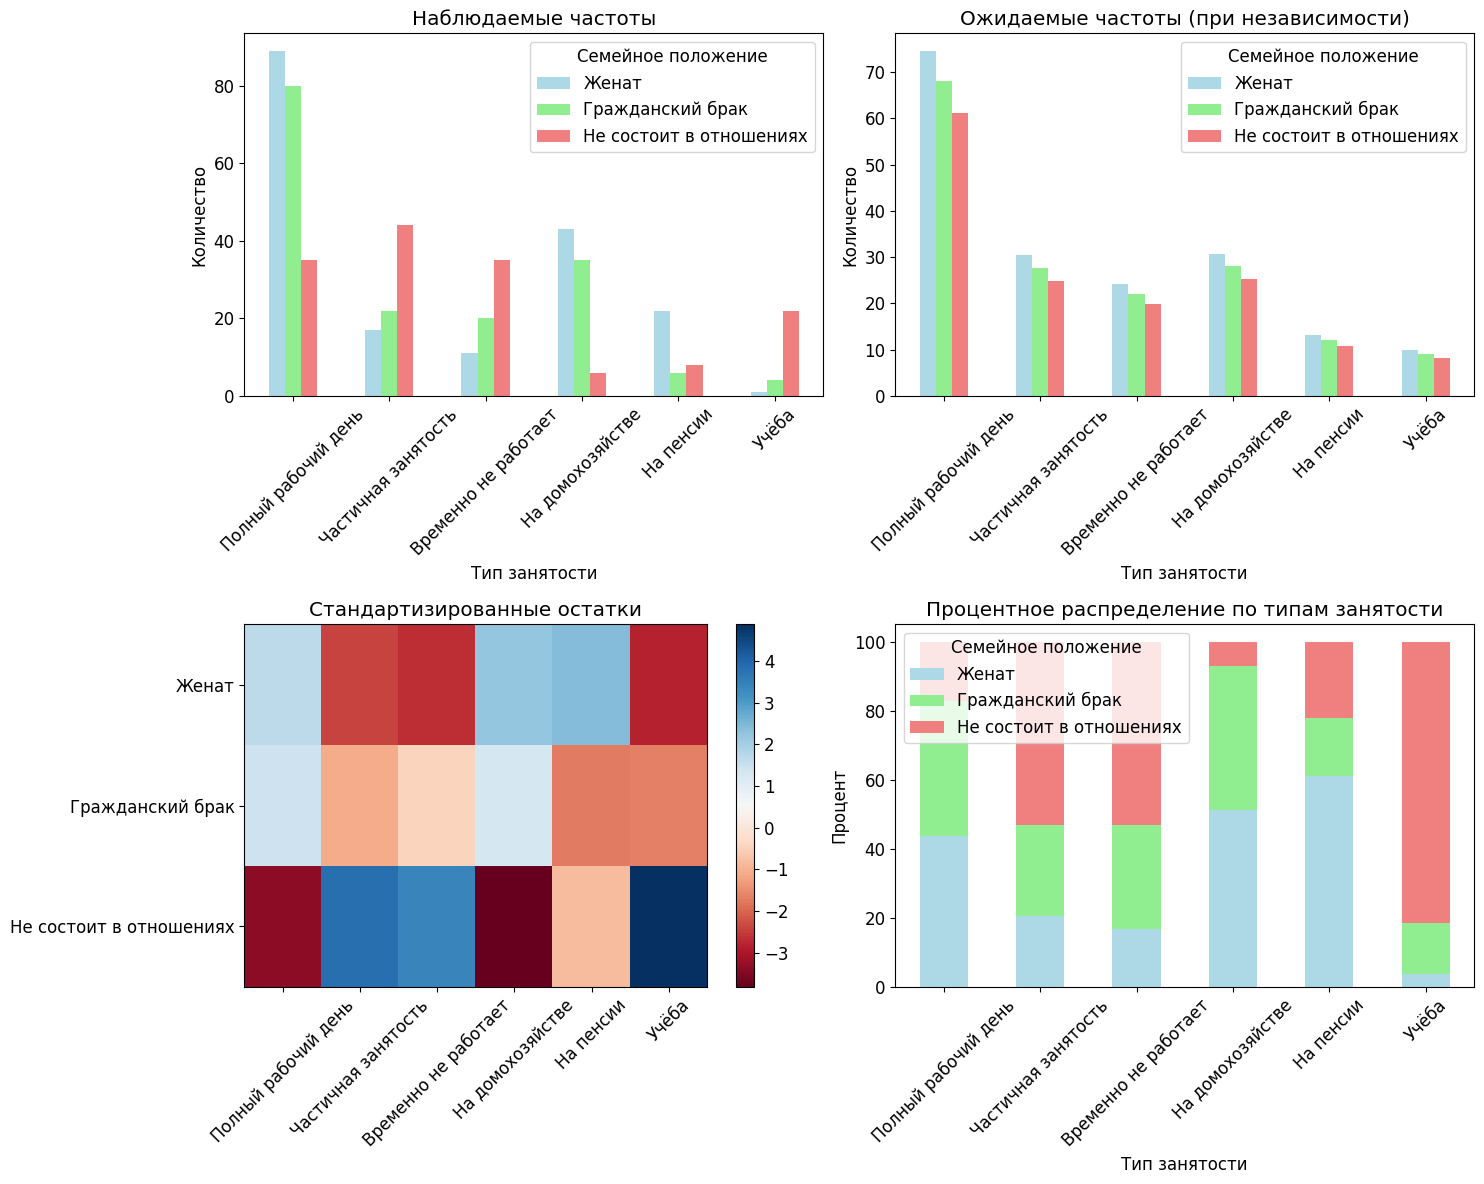

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

data.plot(kind='bar', ax=axes[0,0], color=['lightblue', 'lightgreen', 'lightcoral'])
axes[0,0].set_title('Наблюдаемые частоты')
axes[0,0].set_xlabel('Тип занятости')
axes[0,0].set_ylabel('Количество')
axes[0,0].legend(title='Семейное положение')
axes[0,0].tick_params(axis='x', rotation=45)

expected_df.plot(kind='bar', ax=axes[0,1], color=['lightblue', 'lightgreen', 'lightcoral'])
axes[0,1].set_title('Ожидаемые частоты (при независимости)')
axes[0,1].set_xlabel('Тип занятости')
axes[0,1].set_ylabel('Количество')
axes[0,1].legend(title='Семейное положение')
axes[0,1].tick_params(axis='x', rotation=45)

residuals = (data - expected_df) / np.sqrt(expected_df)
im = axes[1,0].imshow(residuals.T, cmap='RdBu', aspect='auto')
axes[1,0].set_title('Стандартизированные остатки')
axes[1,0].set_xticks(range(len(data.index)))
axes[1,0].set_xticklabels(data.index, rotation=45)
axes[1,0].set_yticks(range(len(data.columns)))
axes[1,0].set_yticklabels(data.columns)
plt.colorbar(im, ax=axes[1,0])

data_pct = data.div(data.sum(axis=1), axis=0) * 100
data_pct.plot(kind='bar', stacked=True, ax=axes[1,1], 
              color=['lightblue', 'lightgreen', 'lightcoral'])
axes[1,1].set_title('Процентное распределение по типам занятости')
axes[1,1].set_xlabel('Тип занятости')
axes[1,1].set_ylabel('Процент')
axes[1,1].legend(title='Семейное положение')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [38]:
print("Анализ наиболее значимых различий:")
print(f"\nСтандартизированные остатки (|значение| > 2 указывает на значимое отклонение):")
for i, employment in enumerate(data.index):
    for j, marital in enumerate(data.columns):
        residual = residuals.iloc[i, j]
        if abs(residual) > 2:
            print(f"  {employment} × {marital}: {residual:.2f}")

print(f"\nКоэффициент связи (Cramér's V):")
n = data.sum().sum()
cramers_v = np.sqrt(chi2_stat / (n * min(data.shape) - 1))
print(f"V = {cramers_v:.3f}")
if cramers_v < 0.1:
    print("Очень слабая связь")
elif cramers_v < 0.3:
    print("Слабая связь")
elif cramers_v < 0.5:
    print("Умеренная связь")
else:
    print("Сильная связь")

Анализ наиболее значимых различий:

Стандартизированные остатки (|значение| > 2 указывает на значимое отклонение):
  Полный рабочий день × Не состоит в отношениях: -3.35
  Частичная занятость × Женат: -2.43
  Частичная занятость × Не состоит в отношениях: 3.83
  Временно не работает × Женат: -2.68
  Временно не работает × Не состоит в отношениях: 3.42
  На домохозяйстве × Женат: 2.21
  На домохозяйстве × Не состоит в отношениях: -3.82
  На пенсии × Женат: 2.43
  Учёба × Женат: -2.83
  Учёба × Не состоит в отношениях: 4.88

Коэффициент связи (Cramér's V):
V = 0.286
Слабая связь


**Выводы:**

**Статистический результат:**
- p-значение меньше 0.05, поэтому отклоняем нулевую гипотезу
- **Семейное положение и занятость статистически связаны**

**Анализ характера связи:**
- **Коэффициент Крамера V** показывает силу связи между переменными
- **Стандартизированные остатки** выявляют наиболее значимые отклонения от независимости

**Практические наблюдения:**
- **Женатые люди** чаще работают полный рабочий день и реже учатся
- **Люди в гражданском браке** показывают промежуточные показатели
- **Не состоящие в отношениях** чаще учатся и работают частично
- **На пенсии** чаще находятся женатые люди (что логично, учитывая возрастные особенности)

**Общий вывод**: Семейное положение значимо влияет на тип занятости. Это может объясняться возрастными факторами, семейными обязанностями и жизненными приоритетами.

## Общий вывод по практической работе

Практическая работа 3 продемонстрировала полный цикл статистического анализа данных - от исследовательского анализа до проверки гипотез. Ключевые достижения:

**Подтверждены фундаментальные теоремы:** Центральная предельная теорема работает даже для асимметричных данных, статистические тесты выявляют реальные закономерности (региональные различия BMI, связь семейного статуса и занятости).

**Освоены практические навыки:** Предобработка real-world данных с пропусками и выбросами, применение параметрических и непараметрических тестов, построение доверительных интервалов, визуализация результатов.

**Получены значимые инсайты:** Статистика - мощный инструмент извлечения знаний, но требует осторожной интерпретации. Статистическая значимость не равна практической важности, а размер выборки критически влияет на результаты тестов.

Освоенные методы применимы в медицине, бизнесе, социальных науках и других областях для принятия обоснованных решений на основе данных.